<a href="https://colab.research.google.com/github/sarahkim430/Python_sideprojects/blob/main/commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Online retail data
: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

* data from: https://archive.ics.uci.edu/ml/datasets/online+retail#

##1.Explore data

In [2]:
# font setting
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [3]:
#import packages

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#mount google drvie 
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#import data
oln = pd.read_excel('/content/drive/MyDrive/Colab_git/OnlineRetail.xlsx')

In [7]:
oln.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Column list:


* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.




* categorical variables:  
               invoiceno, stockcode, description, customerid, country
* numerical variables:  
               quantity, invoicedate, unitprice

In [8]:
oln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
#numerical variable statistics
oln.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
#categorical variable statistics
oln.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [11]:
#summarize data
print("Total # of data: ", oln.shape[0]*oln.shape[1])
print("Total # of missing values: {} = Total data's {:.2f}% ".format(oln.isnull().sum().sum(), (oln.isnull().sum().sum()*100)/(oln.shape[0]*oln.shape[1])))
print("Total # of countries: ", oln.Country.nunique())
print("Total # of sold items: ", oln.Description.nunique())

Total # of data:  4335272
Total # of missing values: 136534 = Total data's 3.15% 
Total # of countries:  38
Total # of sold items:  4223


##2.Questions

* Which customer spent the most?
* What is the distribution of commodity prices?
* Which item sold the most?
* Check the sales amount according to the date
* Will the order amount be different depending on the day of the week?
* What is the average purchase price by country?
* What are the main keywords for the items sold on this website?

##3.Clean data

###3-1. Change the names of columns

In [12]:
#uncapitalize the first letter
oln.columns = oln.columns.str.lower()
oln.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

###3-2. Missing Values

In [13]:
#check how many NaN's in each column
oln.isnull().sum(axis=0)

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [14]:
# check data with missing values 
oln[oln.isnull().any(axis=1)].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [15]:
#remove all the data that don't have customer ID 
oln1 = oln.dropna()
oln1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    406829 non-null  object        
 1   stockcode    406829 non-null  object        
 2   description  406829 non-null  object        
 3   quantity     406829 non-null  int64         
 4   invoicedate  406829 non-null  datetime64[ns]
 5   unitprice    406829 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


###3-3. Change column type

In [16]:
# customer id: float64 > int64
oln1['customerid'] = oln1['customerid'].astype('int64')
oln1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


###3-4. Create new columns

In [17]:
print(min(oln1['quantity']), max(oln1['quantity']))
#we see there's a negative value in the quantity column

-80995 80995


In [18]:
#negative quantity = order cancellation (assumed)
#consider only positive quantity here 
oln1 = oln1[oln1.quantity > 0]

In [19]:
# create 'spent' column = price * quantity 
oln1['spent'] = oln1['quantity'] * oln1['unitprice']
oln1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
#create year, month, day, weekday, hour columns
oln1['year'] = oln1['invoicedate'].dt.year      
oln1['month'] = oln1['invoicedate'].dt.month    
oln1['day'] = oln1['invoicedate'].dt.day       
oln1['weekday'] = oln1['invoicedate'].dt.weekday
oln1['hour'] = oln1['invoicedate'].dt.hour   
oln1.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8


##4.EDA & Visualization


###4-1.Descriptive Analytics

In [21]:
#top 10 products by order 
oln1.description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: description, dtype: int64

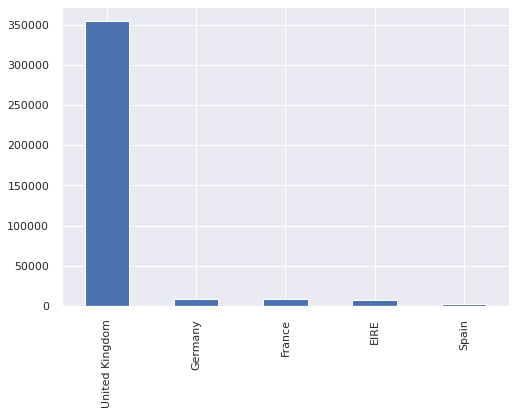

In [22]:
#top 5 countries by order 
oln1.country.value_counts().head(5).plot.bar()

In [23]:
#who spent the most/least?
#add all the spent columns for each customer ID 
res1 = oln1[['customerid','spent']].groupby(['customerid']).sum()
res1.sort_values('spent', ascending=False)

res1 = res1[(res1['spent'] > 0)] #calculate only customers who spent >0

print('Customer {} spent the most {:.2f}'.format(int(res1['spent'].argmax()),res1['spent'].max()))
print('Customer {} spent the least {:.2f}'.format(int(res1['spent'].argmin()),res1['spent'].min()))

Customer 1689 spent the most 280206.02
Customer 3217 spent the least 3.75


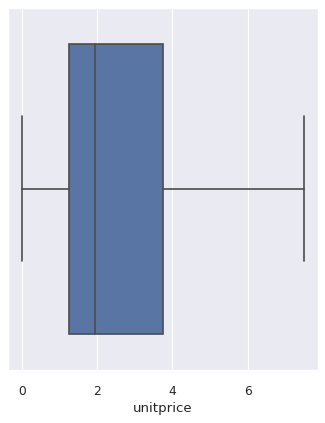

In [24]:
#distribution of the commodity price range in box plot

f, ax = plt.subplots(1, 1, figsize=(5, 6), dpi = 80)

sns.boxplot(oln1['unitprice'], showfliers = False, ax=ax)

#The price range of items is generally around two pounds

In [25]:
#identify the price range of items with large orders
chk1 = oln1[oln1['unitprice']<=8].shape[0]/oln1['unitprice'].shape[0]*100
print("The number of orders that are 8 pounds or less takes up {:.2f} % of all orders.".format(chk1))

The number of orders that are 8 pounds or less takes up 93.28 % of all orders.


In [26]:
#identify the price range of items with large orders
chk2 = np.sum(oln1[oln1['unitprice']<=8].spent)/np.sum(oln1.spent)*100
print("{:.2f} % of the revenue is coming from orders that are 8 pounds or less.".format(chk2))

88.09 % of the revenue is coming from orders that are 8 pounds or less.


###4-2. Sales amount based on date (time series)

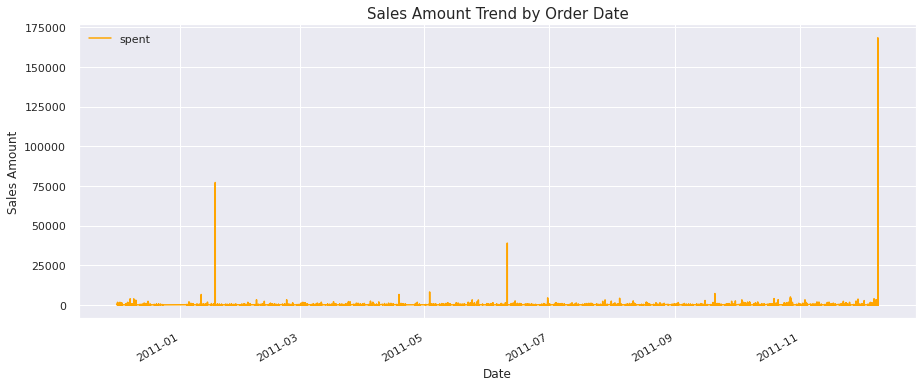

In [27]:
#show the sales amount (spent) according to the order date
oln1.plot(x = 'invoicedate', y = 'spent', color='orange', figsize=(15, 6))

plt.title("Sales Amount Trend by Order Date", fontsize = 15)
plt.xlabel('Date')
plt.ylabel('Sales Amount')

plt.show()

###4-3. Order volume by day/hour

In [28]:
#Leave only one invoice number for each day
res2 = oln1.drop_duplicates(['invoiceno'], keep='first')
res2

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,2,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,2,8
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2010,12,1,2,8
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010,12,1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00,2011,12,9,4,12
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777,United Kingdom,51.84,2011,12,9,4,12
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,4.68,2011,12,9,4,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,2011,12,9,4,12


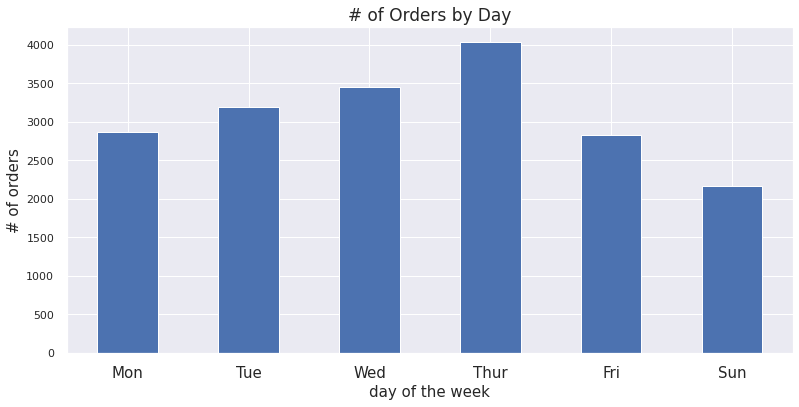

In [29]:
#Check # of orders by day (based on invoice number)
g1 = res2[['weekday','invoiceno']].groupby('weekday').count().plot(kind='bar', figsize=(13,6))

g1.set_xlabel('day of the week',fontsize=15)
g1.set_ylabel('# of orders',fontsize=15)
g1.set_title('# of Orders by Day',fontsize=17)
g1.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
g1.legend('') 

plt.show()

In [30]:
#count # of orders by hour
res3 = res2[['hour','invoiceno']].groupby('hour').count()
res3

,invoiceno
hour,
6,1
7,29
8,555
9,1394
10,2226
11,2277
12,3129
13,2637
14,2275


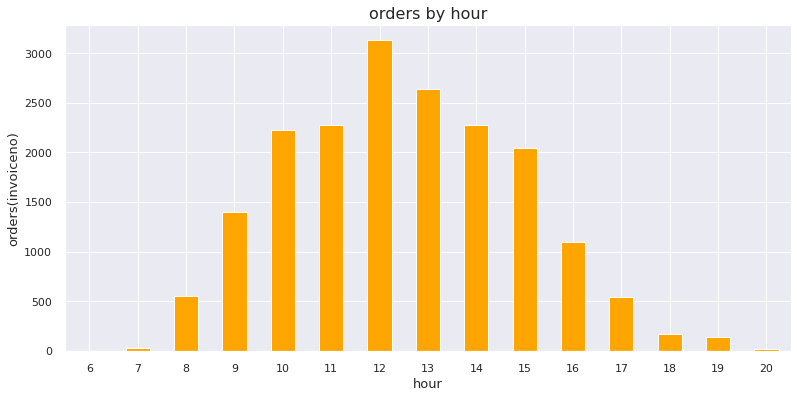

In [31]:
#Check # of orders by hour (based on invoice number)
g2 = res3.plot(kind='bar', color = 'orange', figsize=(13,6))

g2.set_xlabel('hour',fontsize=13)
g2.set_ylabel('orders(invoiceno.)',fontsize=13)
g2.set_title('orders by hour',fontsize=16)
g2.legend('')

plt.xticks(rotation=0)
plt.show()

###4-4. Average purchase amount for one order per country

In [39]:
res4 = oln1[['quantity','spent','country','invoiceno']]
res4

,quantity,spent,country,invoiceno
0,6,15.30,United Kingdom,536365
1,6,20.34,United Kingdom,536365
2,8,22.00,United Kingdom,536365
3,6,20.34,United Kingdom,536365
4,6,20.34,United Kingdom,536365
...,...,...,...,...
541904,12,10.20,France,581587
541905,6,12.60,France,581587
541906,4,16.60,France,581587
541907,4,16.60,France,581587


In [33]:
#Count the order numbers by country and add a column of count = 1
aa = res4.groupby(['country', 'invoiceno']).sum()
aa['count'] = 1
aa

quantity    spent  count
country     invoiceno                          
Australia   536389          107   358.25      1
            537676          214   258.90      1
            539419          146   415.70      1
            540267         4662  7011.38      1
            540280          140   143.00      1
...                         ...      ...    ...
Unspecified 559929          271   252.05      1
            561658          205   347.35      1
            561661          114   199.08      1
            563947          126   252.90      1
            564051           59   278.13      1

[18536 rows x 3 columns]

In [40]:
#sum count column by country
bb = aa.groupby('country').sum()
bb

,quantity,spent,count
country,,,
Australia,84209,138521.310,57
Austria,4881,10198.680,17
Bahrain,260,548.400,2
Belgium,23237,41196.340,98
Brazil,356,1143.600,1
Canada,2763,3666.380,6
Channel Islands,9491,20450.440,26
Cyprus,6361,13590.380,16
Czech Republic,671,826.740,2


In [42]:
#spent/count = average purchase by country 
bb['avg_spent'] = bb['spent'] / bb['count']
bb.sort_values(['count','avg_spent'], ascending=False, inplace=True)
bb.head()

,quantity,spent,count,avg_spent
country,,,,
United Kingdom,4269472,7308391.554,16649,438.968800
Germany,119263,228867.140,457,500.803370
France,111472,209024.050,389,537.336889
EIRE,140525,265545.900,260,1021.330385
Belgium,23237,41196.340,98,420.370816


Text(0.5, 0, 'purchase')

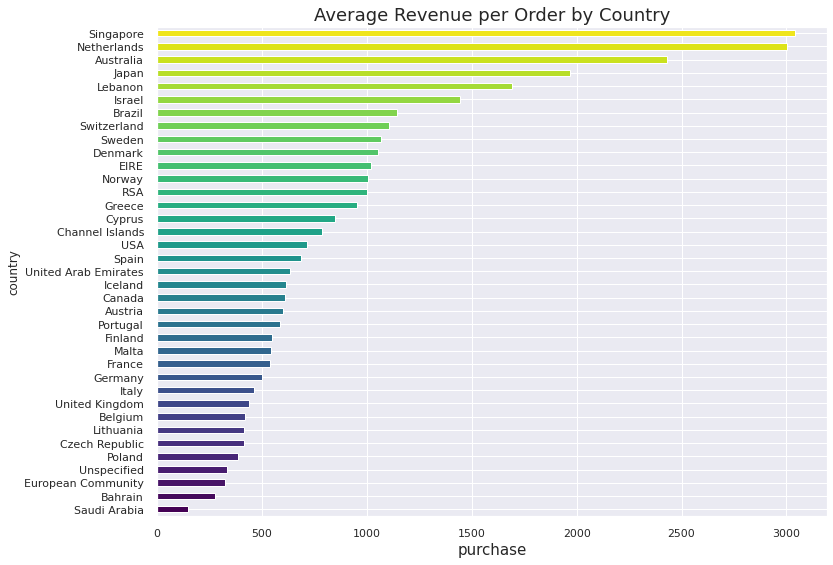

In [43]:
#visualize
color = plt.cm.viridis(np.linspace(0, 1, 38))

bb['avg_spent'].sort_values().plot(kind='barh',figsize=(12,9),color=color)
plt.title('Average Revenue per Order by Country', size=18)
plt.xlabel('purchase',size=15)

###4-5.Words that appear most frequently in the description

In [44]:
#Word cloud 패키지 import
from wordcloud import WordCloud
from wordcloud import STOPWORDS

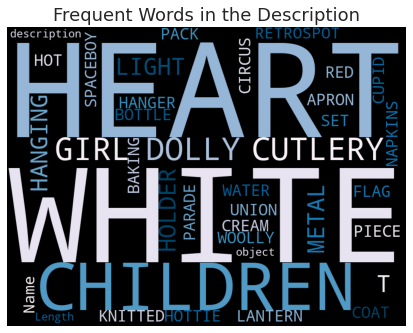

In [45]:
#World cloud
stopwords = set(STOPWORDS)
stopwords.add('dtype') 

wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=800, height=600, colormap = 'PuBu').generate(str(oln1['description']))

plt.axis('off')
plt.title('Frequent Words in the Description', fontsize = 18)
plt.imshow(wordcloud)
#plt.show()

##5.Review

* Online Retail data is:  
Total Data: 4335272  
Total missing values: 136534 = 3.15% of all data  
Total number of countries: 38  
Total number of items sold: 4223  

* Which customer spent the most?  
  : Customer number 1689 spent the most.    
  : Customer number 3217 spen the least.    

* What is the distribution of commodity prices?  
  : The price range of goods is generally around two pounds.  
  : Orders for goods 8 pounds or less account for 93.28 per cent.  
  : 88.09% of the revenue comes from goods 8 pounds or less.   

* Which item sold the most?  
  : WHITE HANGING HEART T-LIGHT HOLDER  

* Is the order quantity different depending on the day/time of the week?  
  : Items are sold on Thursday the most and Sunday the least.  
  : Orders are the most frequent at noon.  

* What is the average amount of purchases per customer per country?  
  : The UK has the highest sales, but Singapore has the highest per capita purchases.  
* What are the main keywords for the items sold in this shopping mall?  
  : white, heart, children  